In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install xgboost


In [3]:
import xgboost as xgb


In [4]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
import six
import sys
sys.modules['sklearn.externals.six'] = six


In [5]:
import pandas as pd


# Load the dataframe
dataframe = pd.read_csv("new_train.csv")
dataframe = pd.read_csv("new_test.csv")
dataframe = pd.read_csv("preprocessed_data.csv")
print('Shape of the data is: ',dataframe.shape)

dataframe.head()

Shape of the data is:  (32950, 14)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,1,1,2,0,0,0,0,7,4,227,4,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,0,0
2,55,5,1,0,0,0,0,0,3,1,550,1,1,1
3,36,0,1,6,0,1,0,1,6,1,120,2,1,0
4,55,5,0,6,0,0,0,0,4,3,368,2,1,0


In [6]:
from sklearn.model_selection import train_test_split
# Predictors
X = dataframe.iloc[:,:-1]

# Target
y = dataframe.iloc[:,-1]

# Dividing the data into train and test subsets
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model with an increased max_iter value
model = LogisticRegression(max_iter=1000)  # You can adjust the value as needed

# Fit the model on your training data
model.fit(x_train, y_train)

# Now you can use the trained model for prediction
y_pred = model.predict(x_val)


(6590,)
(6590,)
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      5798
           1       0.54      0.22      0.31       792

    accuracy                           0.88      6590
   macro avg       0.72      0.60      0.63      6590
weighted avg       0.86      0.88      0.86      6590

ROC_AUC_SCORE is 0.598089379479514


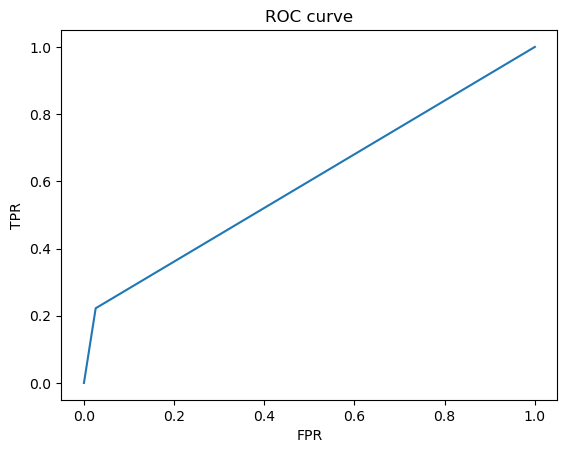

In [8]:
from sklearn.metrics import roc_auc_score
# getting the auc roc curve
auc = roc_auc_score(y_val, y_pred)
print(y_val.shape)
print(y_pred.shape)
print('Classification Report:')
print(classification_report(y_val,y_pred))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_pred))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      5798
           1       0.46      0.45      0.45       792

    accuracy                           0.87      6590
   macro avg       0.69      0.69      0.69      6590
weighted avg       0.87      0.87      0.87      6590

ROC_AUC_SCORE is 0.6882693788523384


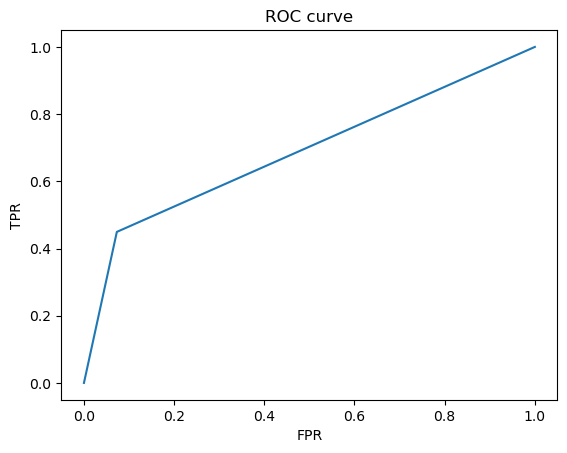

In [9]:
# Run Decision Tree Classifier
model = DecisionTreeClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [10]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn import tree
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [12]:
import graphviz
@interact
def plot_tree(crit=["gini", "entropy"],
              split=["best", "random"],
              depth=IntSlider(min=1,max=30,value=2, continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    
    estimator = DecisionTreeClassifier(random_state=0,
                                       criterion=crit,
                                       splitter = split,
                                       max_depth = depth,
                                       min_samples_split=min_split,
                                       min_samples_leaf=min_leaf)
    estimator.fit(x_train, y_train)
    print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(x_train))))
    print('Decision Tree Test Accuracy: {:.3f}'.format(accuracy_score(y_val, estimator.predict(x_val))))

    graph = Source(tree.export_graphviz(estimator,
                                        out_file=None,
                                        feature_names=x_train.columns,
                                        class_names=['0', '1'],
                                        filled = True))
    
    #display(Image(data=graph.pipe(format='png')))
    
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5798
           1       0.65      0.35      0.46       792

    accuracy                           0.90      6590
   macro avg       0.78      0.66      0.70      6590
weighted avg       0.88      0.90      0.89      6590

ROC_AUC_SCORE is 0.6636597085027578


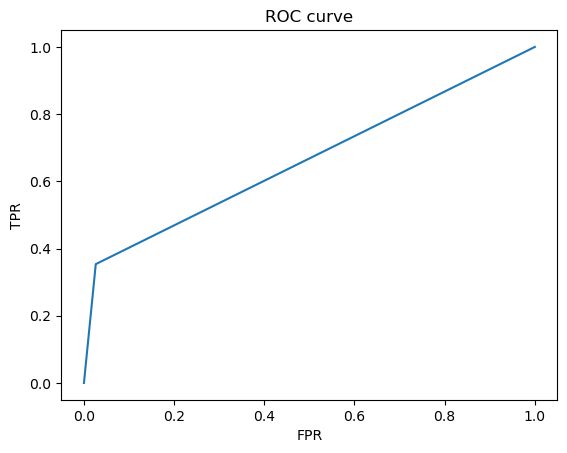

In [13]:
# run Random Forrest Classifier
model = RandomForestClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
model = LogisticRegression()

# Specify the number of features to select
num_features_to_select = 8

# Create the RFE object
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)

# Fit the RFE model
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]



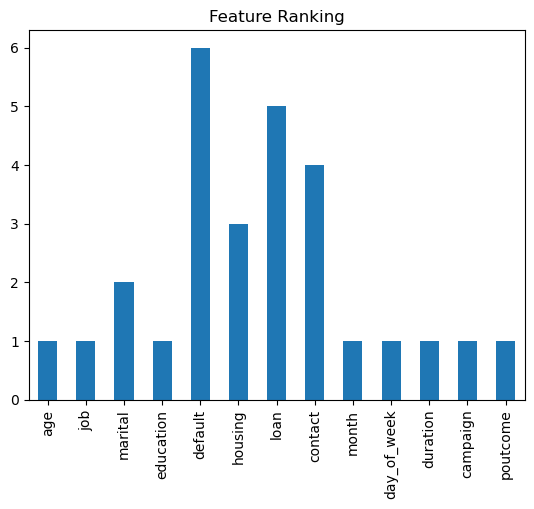

Features to be selected for Random Forest Classifier are:
['age', 'job', 'education', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome']


In [15]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Create a Random Forest Classifier model
model = RandomForestClassifier()

# Specify the number of features to select
num_features_to_select = 8

# Create the RFE object
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)

# Fit the RFE model
rfe.fit(X, y)

# Ranking features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns)

# Plot the feature ranking (for example, you can use a bar plot)
feature_ranking.plot(kind='bar')
plt.title('Feature Ranking')
plt.show()

# Print the selected features
selected_features = feature_ranking[feature_ranking.values == 1].index.tolist()
print('Features to be selected for Random Forest Classifier are:')
print(selected_features)
print('=' * 90)  # Using a longer separator for clarity


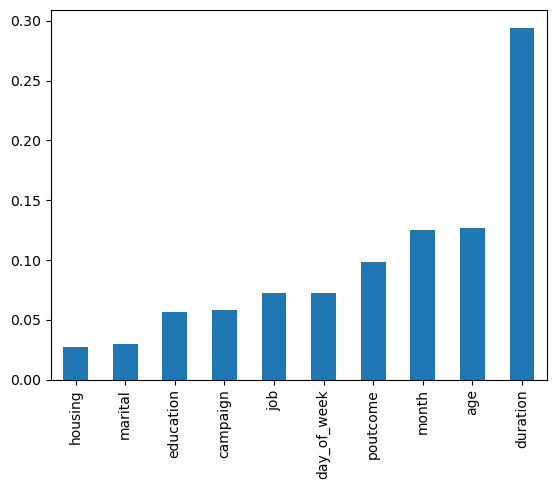

In [16]:
# splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# selecting the data
rfc = RandomForestClassifier(random_state=42)
# fitting the data
rfc.fit(X_train, y_train)
# predicting the data
y_pred = rfc.predict(X_test)
# feature importances
rfc_importances = pd.Series(rfc.feature_importances_, index=X.columns).sort_values().tail(10)
# plotting bar chart according to feature importance
rfc_importances.plot(kind='bar')
plt.show()

In [17]:
# splitting the data
x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
# selecting the classifier
rfc = RandomForestClassifier()
# selecting the parameter
param_grid = { 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
             }
# using grid search with respective parameters
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
# fitting the model
grid_search_model.fit(x_train, y_train)
# printing the best parameters
print('Best Parameters are:',grid_search_model.best_params_)

Best Parameters are: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}


In [18]:
pip install yellowbrick


Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install -U yellowbrick


Note: you may need to restart the kernel to use updated packages.


[[6880 1891]
 [ 258  856]]


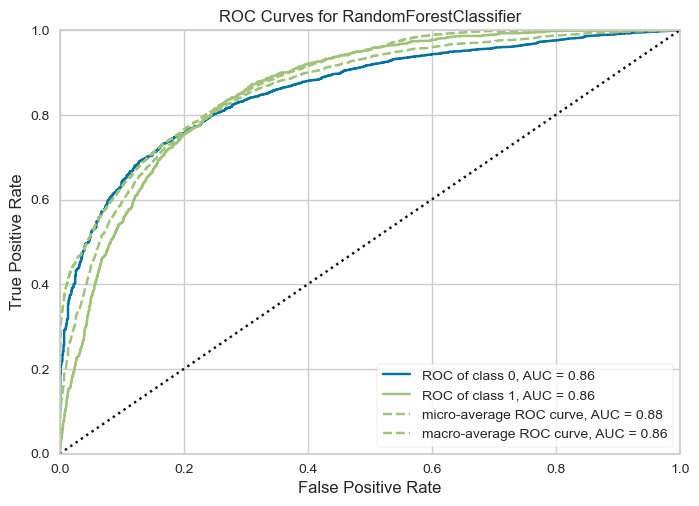

In [20]:
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import ROCAUC

# A function to use SMOTE
def grid_search_random_forest_best(dataframe, target):
    # Splitting the data, fitting the model, and so on

    # Applying SMOTE on the training data for dealing with class imbalance
    smote = SMOTE()
    X_sm, y_sm = smote.fit_resample(x_train, y_train)  # Use fit_resample instead of fit_sample

    rfc = RandomForestClassifier(n_estimators=11, max_features='auto', max_depth=8, criterion='entropy', random_state=42)

    rfc.fit(X_sm, y_sm)

    y_pred = rfc.predict(x_val)

    # Print confusion matrix and ROC-AUC curve
    print(confusion_matrix(y_val, y_pred))
    
    visualizer = ROCAUC(rfc)
    visualizer.fit(X_sm, y_sm)  # Fit on the resampled data
    visualizer.score(x_val, y_val)
    visualizer.show()

# Call the function
grid_search_random_forest_best(X, y)


[[6891 1880]
 [ 263  851]]


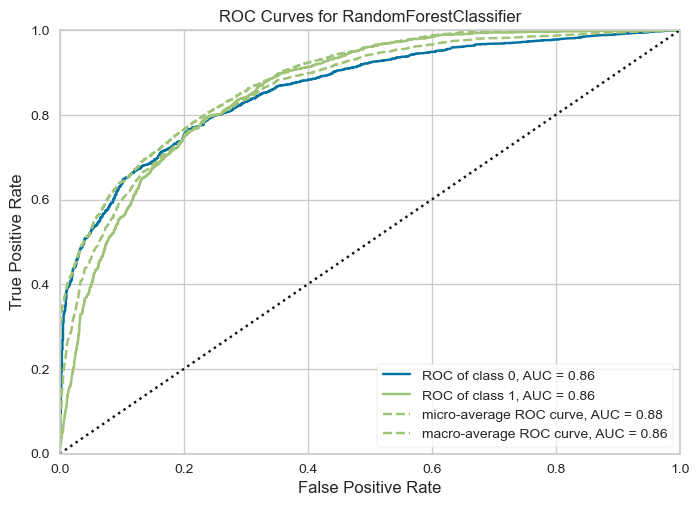

In [21]:
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import ROCAUC

# A function to use SMOTE
def grid_search_random_forest_best(dataframe, target):
    # Splitting the data, fitting the model, and so on

    # Applying SMOTE on the training data for dealing with class imbalance
    smote = SMOTE()
    X_sm, y_sm = smote.fit_resample(x_train, y_train)  # Use fit_resample instead of fit_sample

    rfc = RandomForestClassifier(n_estimators=11, max_features='auto', max_depth=8, criterion='entropy', random_state=42)

    rfc.fit(X_sm, y_sm)

    y_pred = rfc.predict(x_val)

    # Print confusion matrix and ROC-AUC curve
    print(confusion_matrix(y_val, y_pred))
    
    visualizer = ROCAUC(rfc)
    visualizer.fit(X_sm, y_sm)  # Fit on the resampled data
    visualizer.score(x_val, y_val)
    visualizer.show()

# Call the function
grid_search_random_forest_best(X[['age', 'job', 'education', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome']], y)


[[6918 1853]
 [ 261  853]]


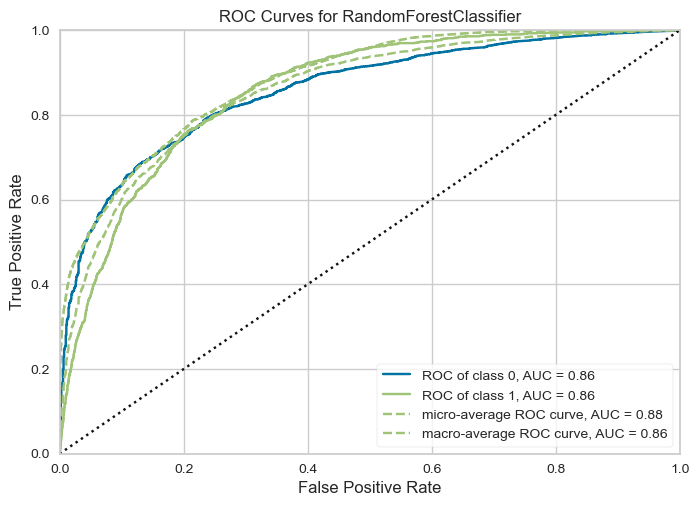

In [22]:
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import ROCAUC

# A function to use SMOTE
def grid_search_random_forest_best(dataframe, target):
    # Splitting the data, fitting the model, and so on

    # Applying SMOTE on the training data for dealing with class imbalance
    smote = SMOTE()
    X_sm, y_sm = smote.fit_resample(x_train, y_train)  # Use fit_resample instead of fit_sample

    rfc = RandomForestClassifier(n_estimators=11, max_features='auto', max_depth=8, criterion='entropy', random_state=42)

    rfc.fit(X_sm, y_sm)

    y_pred = rfc.predict(x_val)

    # Print confusion matrix and ROC-AUC curve
    print(confusion_matrix(y_val, y_pred))
    
    visualizer = ROCAUC(rfc)
    visualizer.fit(X_sm, y_sm)  # Fit on the resampled data
    visualizer.score(x_val, y_val)
    visualizer.show()

# Call the function
grid_search_random_forest_best(X[['age', 'job', 'education', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome']], y)


              precision    recall  f1-score   support

           0       0.95      0.90      0.93      8771
           1       0.45      0.64      0.53      1114

    accuracy                           0.87      9885
   macro avg       0.70      0.77      0.73      9885
weighted avg       0.90      0.87      0.88      9885

[[7906  865]
 [ 403  711]]


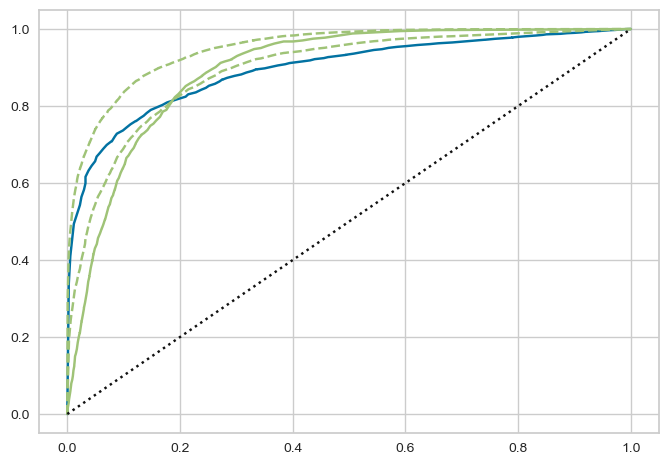

In [25]:
from yellowbrick.classifier import ROCAUC

# Earlier code for defining and resampling data with SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(x_train, y_train)

# Create a RandomForestClassifier or another model
model = RandomForestClassifier()

# Using the ROC-AUC visualizer
visualizer = ROCAUC(model)
visualizer.fit(X_sm, y_sm)  # Fit on the resampled data
visualizer.score(x_val, y_val)

# Print classification report and confusion matrix
y_pred = model.predict(x_val)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))


In [26]:
test = pd.read_csv('new_test.csv')
test.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,32,4,0,6,0,0,0,0,3,3,131,5,1
1,37,10,3,6,0,0,0,0,4,3,100,1,1
2,55,5,0,5,1,2,0,0,3,2,131,2,1
3,44,2,1,0,1,0,0,1,4,3,48,2,1
4,28,0,2,3,0,0,0,0,5,0,144,2,1
5,45,10,1,2,0,0,0,0,1,0,126,3,1
6,55,0,0,6,0,0,0,0,7,0,189,1,1
7,46,0,1,3,0,0,0,1,4,3,107,3,1
8,53,1,2,2,0,2,0,0,3,4,355,1,1
9,30,0,2,6,0,0,0,0,1,1,135,1,1


In [27]:
# Earlier code for defining and resampling data with SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(x_train, y_train)  # Use fit_resample instead of fit_sample
rfc = RandomForestClassifier()
# selecting the parameter
param_grid = { 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
             }
# using grid search with respective parameters
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)

# fitting the model
grid_search_model.fit(X_sm, y_sm)
    
# Predict on the preprocessed test file
y_pred = grid_search_model.predict(test)

In [28]:
prediction = pd.DataFrame(y_pred,columns=['y'])
submission = pd.concat([prediction['y']],1)

submission.to_csv('submission.csv',index=False)

In [29]:
from sklearn.metrics import accuracy_score

# Assuming you have already trained your model and made predictions on the validation data
y_pred = model.predict(x_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.8717248356095093


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_pred = logistic_model.predict(x_val)
logistic_accuracy = accuracy_score(y_val, logistic_pred)

# Define and train the Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)
tree_pred = tree_model.predict(x_val)
tree_accuracy = accuracy_score(y_val, tree_pred)

# Define and train the Random Forest model
forest_model = RandomForestClassifier()
forest_model.fit(x_train, y_train)
forest_pred = forest_model.predict(x_val)
forest_accuracy = accuracy_score(y_val, forest_pred)

# Print the accuracies for each model
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Decision Tree Accuracy:", tree_accuracy)
print("Random Forest Accuracy:", forest_accuracy)


Logistic Regression Accuracy: 0.8867981790591806
Decision Tree Accuracy: 0.8725341426403642
Random Forest Accuracy: 0.8987354577642893
